In [1]:
# Common libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from PIL import Image
import random
from sklearn.metrics import confusion_matrix

# TensorFlow imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,\
                                    GlobalAveragePooling2D, BatchNormalization                                  
from tensorflow.keras import utils, regularizers
from tensorflow.keras.callbacks import EarlyStopping, History
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.optimizers import Adam

# Setting a random seed
np.random.seed(42)

/usr/local/Caskroom/miniconda/base/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (ty

In [2]:
TARGETS = ['Normal', 'Cancerous']

train_dir = './cnn_train'
test_dir = './cnn_test'

In [3]:
# Creating an empty list to be populated by the image array and class
training_data = []
def create_training_data():
    for target in TARGETS:
        # Join the directory and target
        path = os.path.join(train_dir, target)
        # Index the target 0-normal, 1-cancerous
        class_num = TARGETS.index(target)
        for img in os.listdir(path):
            # Openning an image by joining the path with the image file name
            im = Image.open(os.path.join(path, img))
            # Create a np.array of the newly cropped 32x32 pixel image
            img_array = np.array(im.crop((32, 32, 64, 64)))
            # Append the array and class index to the empty list
            training_data.append([img_array, class_num])
                            
create_training_data()

In [4]:
# Creating an empty list to be populated by the image array and class
testing_data = []
def create_testing_data():
    for target in TARGETS:
        # Join the directory and target
        path = os.path.join(test_dir, target)
        # Index the target 0-normal, 1-cancerous
        class_num = TARGETS.index(target)
        for img in os.listdir(path):
            # Openning an image by joining the path with the image file name
            im = Image.open(os.path.join(path, img))
            # Create a np.array of the newly cropped 32x32 pixel image
            img_array = np.array(im.crop((32, 32, 64, 64)))
            # Append the array and class index to the empty list
            testing_data.append([img_array, class_num])
            
create_testing_data()

In [5]:
X_train = []
y_train = []

# Creating X_train - y_train
for features, label in training_data:
    X_train.append(features)
    y_train.append(label)
  
 # Reshape the x_train array
X_train = np.array(X_train).reshape(-1, 32, 32, 3)

In [6]:
X_test = []
y_test = []

# Creating X_test, y_test
for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)
    
 # Reshape the x_test array
X_test = np.array(X_test).reshape(-1, 32, 32, 3)

In [7]:
model = Sequential()

model.add(Conv2D(
    filters = 16,
    kernel_size = (3,3),
    activation = "relu",
    input_shape = (32, 32, 3)
))

model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(
    filters = 64, 
    kernel_size = (2,2),
    activation = "relu"))

model.add(MaxPooling2D(
    pool_size = (2,2)
))

model.add(Flatten())

model.add(Dense(
    128, 
    activation = "relu",
    kernel_regularizer = regularizers.l2(0.25)
))

model.add(Dropout(0.5))

model.add(Dense(
    1, 
    activation = "sigmoid",
    kernel_regularizer = regularizers.l2(0.25)
))

es = EarlyStopping(
    monitor = "val_loss",
    min_delta = 0,
    patience = 5
)

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

history = model.fit(
        X_train,
        y_train,
        batch_size = 256,
        validation_data = (X_test, y_test),
        epochs = 20,
        callbacks = [es],
        verbose = 1,
        shuffle = True
)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 176022 samples, validate on 44003 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
176022/176022 [==============================] - 100s 567us/sample - loss: 3.5675 - acc: 0.6886 - val_loss: 0.5417 - val_acc: 0.7670
Epoch 2/20
176022/176022 [==============================] - 91s 516us/sample - loss: 0.5447 - acc: 0.7646 - val_loss: 0.5257 - val_acc: 0.7758
Epoch 3/20
176022/176022 [==============================] - 96s 544us/sample - loss: 0.5367 - acc: 0.7696 - val_loss: 0.5494 - val_acc: 0.7557
Epoch 4/20
176022/176022 [==============================] - 94s 532us/sample - loss: 0.5311 - acc: 0.7706 - val_loss: 0.5176 - val_acc: 0.7754
Epoch 5/20
176022/176022 [==============================] - 96s 545us/sample - loss: 0.5268 - acc: 0.7733 - val_loss: 0.5326 - val_acc: 0.757

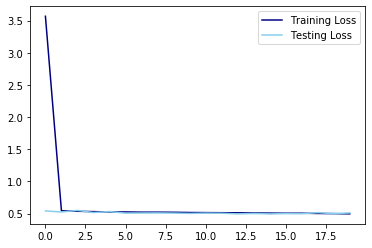

In [8]:
train_loss = history.history["loss"]
test_loss = history.history["val_loss"]

plt.plot(train_loss, label = "Training Loss", color = "navy")
plt.plot(test_loss, label = "Testing Loss", color = "skyblue")
plt.legend();

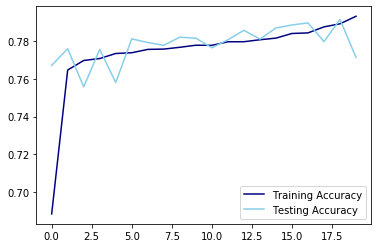

In [9]:
train_acc = history.history["acc"]
test_acc = history.history["val_acc"]

plt.plot(train_acc, label = "Training Accuracy", color = "navy")
plt.plot(test_acc, label = "Testing Accuracy", color = "skyblue")
plt.legend();

In [32]:
y_pred = model.predict_classes(X_test)

cm = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm)

,0,1
0,19267,6914
1,3154,14668
